# Bilingual Ratio Notebook Version 2
Go to Cell > Run All to run the notebook. 

In [220]:
import pandas as pd
import numpy as np 
import csv
import matplotlib.pyplot as plt

In [221]:
df = pd.read_csv("1060_responses.csv")

This gives you a general sense of the language breakdown of the participant.

In [222]:
list(df.columns.values)

['Adult2OtherChild',
 'Adult2Others',
 'Adult2TargetChild',
 'Adult2unsure',
 'Adultfemale',
 'Adultmale',
 'Childvoc',
 'Media',
 'Multiple_adults',
 'Otherchild2OtherChild',
 'Otherchild2TargetChild',
 'Otherchild2adults',
 'Otherchild2unsure',
 'PID',
 'Unsure_adults',
 'age_YYMMDD',
 'annotate_date_YYYYMMDD',
 'annotator',
 'beginoptions',
 'comments',
 'date_YYYYMMDD',
 'file_name',
 'gender',
 'id',
 'outdir',
 'percents_voc',
 'repeats',
 'researcher_present',
 'sleeping',
 'timestamp_HHMMSS']

In [223]:
languageCols = ['Adult2OtherChild',
 'Adult2Others',
 'Adult2TargetChild',
 'Adult2unsure',
'Otherchild2OtherChild',
 'Otherchild2TargetChild',
 'Otherchild2adults',
 'Otherchild2unsure']
languageCols

['Adult2OtherChild',
 'Adult2Others',
 'Adult2TargetChild',
 'Adult2unsure',
 'Otherchild2OtherChild',
 'Otherchild2TargetChild',
 'Otherchild2adults',
 'Otherchild2unsure']

In [224]:
df_lang = pd.DataFrame(df, columns=languageCols)
df_val_count = df_lang.apply(pd.Series.value_counts)

language category breakdown (independent of addressee)


In [225]:
df_lang_indep = df_val_count[~df_val_count.index.str.contains('Categorize')].sum(axis=1)
df_lang_indep

English/Quechua    79.0
Mixed              25.0
None                2.0
Spanish            46.0
Unsure             52.0
dtype: float64

addressee breakdown (independent of language)

In [226]:
df_add_indep = df_val_count[~df_val_count.index.str.contains('Categorize')].sum(axis=0)
df_add_indep

Adult2OtherChild          35.0
Adult2Others              58.0
Adult2TargetChild         11.0
Adult2unsure              24.0
Otherchild2OtherChild     13.0
Otherchild2TargetChild     8.0
Otherchild2adults         32.0
Otherchild2unsure         23.0
dtype: float64

language*addressee breakdown

In [227]:
df_val_count[~df_val_count.index.str.contains('Categorize')]

,Adult2OtherChild,Adult2Others,Adult2TargetChild,Adult2unsure,Otherchild2OtherChild,Otherchild2TargetChild,Otherchild2adults,Otherchild2unsure
English/Quechua,9.0,47.0,4.0,13.0,3.0,NaN,3.0,NaN
Mixed,8.0,7.0,2.0,NaN,NaN,NaN,8.0,NaN
None,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
Spanish,12.0,1.0,4.0,1.0,7.0,4.0,12.0,5.0
Unsure,6.0,2.0,1.0,9.0,3.0,4.0,9.0,18.0


bar graph of language category count


In [228]:
df_lang_indep.index

Index(['English/Quechua', 'Mixed', 'None', 'Spanish', 'Unsure'], dtype='object')

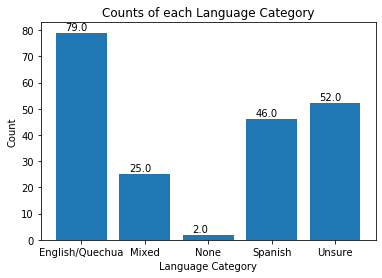

In [229]:
x = np.arange(len(df_lang_indep))
plt.bar(x, df_lang_indep)
plt.xticks(x, df_lang_indep.index)
plt.title('Counts of each Language Category')
plt.xlabel('Language Category')
plt.ylabel('Count')
for i, v in enumerate(df_lang_indep):
    plt.text(x[i] - .25, v + 1.1, str(v))
plt.show()

bar graph of addressee category count

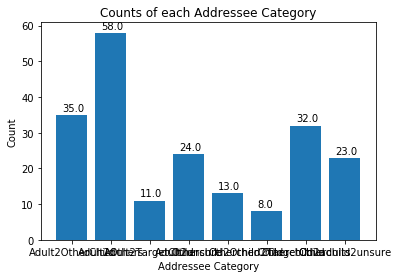

In [230]:
x = np.arange(len(df_add_indep))
plt.bar(x, df_add_indep)
plt.xticks(x, df_add_indep.index)
plt.title('Counts of each Addressee Category')
plt.xlabel('Addressee Category')
plt.ylabel('Count')
for i, v in enumerate(df_add_indep):
    plt.text(x[i] - .25, v + 1.1, str(v))
plt.show()

## Bilingual Ratio/Variance vs. Entry Number

In [231]:
spanish, quechua, mixed, other = 1, 1, 1, 1
num = 0
entryNums = []
spanishRatios = []
quechuaRatios = []
mixedRatios = []
variances = []
for index, row in df.iterrows():
    for column in languageCols:
        lang = row[column]
        if lang == 'Spanish': 
            spanish += 1 
        elif lang == 'English/Quechua':
            quechua += 1 
        elif lang == 'Mixed': 
            mixed += 1
        else: 
            other += 1
    entryNums.append(num)
    num += 1
    spanishRatios.append(spanish/(quechua + spanish + mixed))
    quechuaRatios.append(quechua/(quechua + spanish + mixed))
    mixedRatios.append(mixed/(quechua + spanish + mixed))
    variances.append(np.var(spanishRatios))

## Bilingual Ratio
This will display the ratio of the Spanish counts compared to the rest of the counts, an error bar is also displayed which shows the variance at each point, which should also decrease.

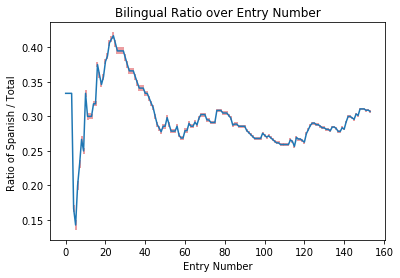

In [232]:
### RATIOS VS ENTRY NUMS
plt.title('Bilingual Ratio over Entry Number')
plt.ylabel('Ratio of Spanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, spanishRatios)
plt.errorbar(entryNums, spanishRatios, yerr=variances, fmt='none', ecolor='#e67f83');
plt.show()

## Variance
We want variance to get lower over the number of entries, so that the Spanish bilingual ratio stabilizes over time. It is important to watch variance and the graph above, just marking the ratio to find out when there have been enough entries annotated.

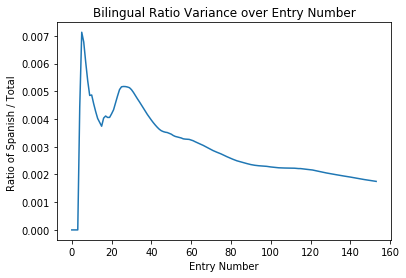

In [233]:
## VARIANCE VS ENTRY NUMS
plt.title('Bilingual Ratio Variance over Entry Number')
plt.ylabel('Ratio of Spanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, variances)
plt.show()

## Stackplot of Ratios
This shows what the breakdown over entry number each language has.

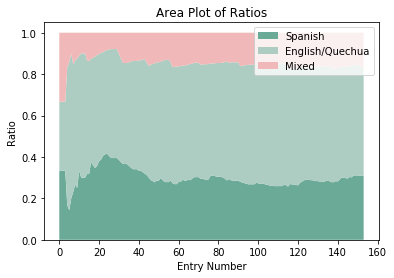

In [234]:
plt.stackplot(entryNums, [spanishRatios, quechuaRatios, mixedRatios], baseline='zero', labels=['Spanish', 'English/Quechua', 
                            'Mixed'], colors=['#6aaa96', '#aecdc2', '#f0b8b8'])
plt.title('Area Plot of Ratios')
plt.xlabel('Entry Number')
plt.ylabel('Ratio')
plt.legend()
plt.show()

addressee ratio over entry number
addressee ratio variance over entry number
area plot of addressee ratios


## Addressee Ratio

In [235]:
adult, target_child, other_child, unsure = 1, 1, 1, 1
num = 0
entryNums = []
adultRatios = []
targetRatios = []
otherRatios = []
variances = []
languages = ['Spanish', 'English/Quechua', 'Mixed']
adultCols = ['Otherchild2adults', 'Adult2Others']
targetCols = ['Otherchild2TargetChild', 'Adult2TargetChild']
otherCols = ['Otherchild2OtherChild', 'Adult2OtherChild']
for index, row in df.iterrows():
    for column in languageCols:
        lang = row[column]
        if lang in languages: 
            if column in adultCols: 
                adult += 1
            elif column in targetCols: 
                target_child += 1
            elif column in otherCols: 
                other_child += 1
            else: 
                unsure += 1
    entryNums.append(num)
    num += 1
    adultRatios.append(adult/(target_child + adult + other_child))
    targetRatios.append(target_child/(target_child + adult + other_child))
    otherRatios.append(other_child/(target_child + adult + other_child))
    variances.append(np.var(adultRatios))

## Addressee Ratio

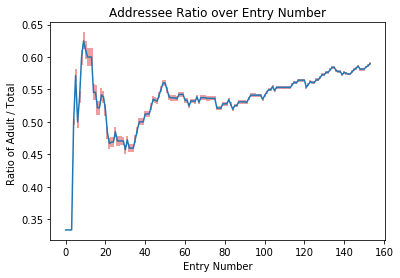

In [236]:
### RATIOS VS ENTRY NUMS
plt.title('Addressee Ratio over Entry Number')
plt.ylabel('Ratio of Adult / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, adultRatios)
plt.errorbar(entryNums, adultRatios, yerr=variances, fmt='none', ecolor='#e67f83');
plt.show()

## Stackplot Addressee Ratios

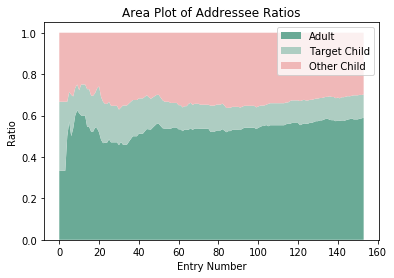

In [237]:
plt.stackplot(entryNums, [adultRatios, targetRatios, otherRatios], baseline='zero', labels=['Adult', 'Target Child', 
                            'Other Child'], colors=['#6aaa96', '#aecdc2', '#f0b8b8'])
plt.title('Area Plot of Addressee Ratios')
plt.xlabel('Entry Number')
plt.ylabel('Ratio')
plt.legend()
plt.show()

Spanish to adult, Quechua to adult, Mixed to adult, Spanish to other child, Quechua to other child, Mixed to other child, Spanish to target child, Quechua to target child, and Mixed to target child.

In [238]:
spanish_adult, spanish_target_child, spanish_other_child, spanish_unsure = 1, 1, 1, 1
quechua_adult, quechua_target_child, quechua_other_child, quechua_unsure = 1, 1, 1, 1
mixed_adult, mixed_target_child, mixed_other_child, mixed_unsure = 1, 1, 1, 1

num = 0
entryNums = []
spanishAdultRatios, spanishTargetRatios, spanishOtherRatios = [], [], []
quechuaAdultRatios, quechuaTargetRatios, quechuaOtherRatios = [], [], []
mixedAdultRatios, mixedTargetRatios, mixedOtherRatios = [], [], []
spanishVariances, quechuaVariances, mixedVariances = [], [], []

adultSpanishRatios, adultQuechuaRatios, adultMixedRatios = [], [], []
targetSpanishRatios, targetQuechuaRatios, targetMixedRatios = [], [], []
otherSpanishRatios, otherQuechuaRatios, otherMixedRatios = [], [], []
adultVariances, targetVariances, otherVariances = [], [], []


languages = ['Spanish', 'English/Quechua', 'Mixed']
adultCols = ['Otherchild2adults', 'Adult2Others']
targetCols = ['Otherchild2TargetChild', 'Adult2TargetChild']
otherCols = ['Otherchild2OtherChild', 'Adult2OtherChild']

for index, row in df.iterrows():
    for column in languageCols:
        lang = row[column]
        if lang == 'Spanish': 
            if column in adultCols: 
                spanish_adult += 1
            elif column in targetCols: 
                spanish_target_child += 1
            elif column in otherCols: 
                spanish_other_child += 1
            else: 
                spanish_unsure += 1
        elif lang == 'English/Quechua':
            if column in adultCols: 
                quechua_adult += 1
            elif column in targetCols: 
                quechua_target_child += 1
            elif column in otherCols: 
                quechua_other_child += 1
            else: 
                quechua_unsure += 1
        elif lang == 'Mixed':
            if column in adultCols: 
                mixed_adult += 1
            elif column in targetCols: 
                mixed_target_child += 1
            elif column in otherCols: 
                mixed_other_child += 1
            else: 
                mixed_unsure += 1
            
    entryNums.append(num)
    num += 1
    
    spanishAdultRatios.append(spanish_adult/(spanish_target_child + spanish_adult + spanish_other_child))
    spanishTargetRatios.append(spanish_target_child/(spanish_target_child + spanish_adult + spanish_other_child))
    spanishOtherRatios.append(spanish_other_child/(spanish_target_child + spanish_adult + spanish_other_child))
    spanishVariances.append(np.var(spanishAdultRatios))
    
    quechuaAdultRatios.append(quechua_adult/(quechua_target_child + quechua_adult + quechua_other_child))
    quechuaTargetRatios.append(quechua_target_child/(quechua_target_child + quechua_adult + quechua_other_child))
    quechuaOtherRatios.append(quechua_other_child/(quechua_target_child + quechua_adult + quechua_other_child))
    quechuaVariances.append(np.var(quechuaAdultRatios))

    mixedAdultRatios.append(mixed_adult/(mixed_target_child + mixed_adult + mixed_other_child))
    mixedTargetRatios.append(mixed_target_child/(mixed_target_child + mixed_adult + mixed_other_child))
    mixedOtherRatios.append(mixed_other_child/(mixed_target_child + mixed_adult + mixed_other_child))
    mixedVariances.append(np.var(mixedAdultRatios))
    
    adultSpanishRatios.append(spanish_adult/(spanish_adult + quechua_adult + mixed_adult))
    adultQuechuaRatios.append(quechua_adult/(spanish_adult + quechua_adult + mixed_adult))
    adultMixedRatios.append(mixed_adult/(spanish_adult + quechua_adult + mixed_adult))
    adultVariances.append(np.var(adultSpanishRatios))
    
    targetSpanishRatios.append(spanish_target_child/(spanish_target_child + quechua_target_child + mixed_target_child))
    targetQuechuaRatios.append(quechua_target_child/(spanish_target_child + quechua_target_child + mixed_target_child))
    targetMixedRatios.append(mixed_target_child/(spanish_target_child + quechua_target_child + mixed_target_child))
    targetVariances.append(np.var(targetSpanishRatios))
    
    otherSpanishRatios.append(spanish_other_child/(spanish_other_child + quechua_other_child + mixed_other_child))
    otherQuechuaRatios.append(quechua_other_child/(spanish_other_child + quechua_other_child + mixed_other_child))
    otherMixedRatios.append(mixed_other_child/(spanish_other_child + quechua_other_child + mixed_other_child))
    otherVariances.append(np.var(otherSpanishRatios))


### Spanish to Adult

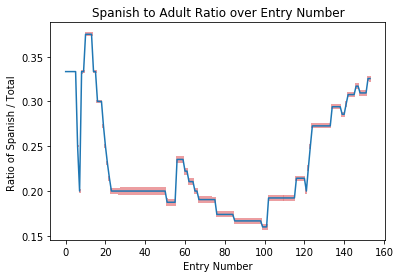

In [239]:
### RATIOS VS ENTRY NUMS
plt.title('Spanish to Adult Ratio over Entry Number')
plt.ylabel('Ratio of Spanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, spanishAdultRatios)
plt.errorbar(entryNums, spanishAdultRatios, yerr=spanishVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Spanish to Target

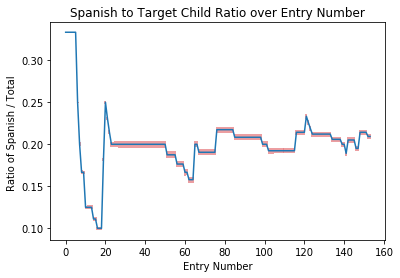

In [240]:
plt.title('Spanish to Target Child Ratio over Entry Number')
plt.ylabel('Ratio of Spanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, spanishTargetRatios)
plt.errorbar(entryNums, spanishTargetRatios, yerr=spanishVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Spanish to Other

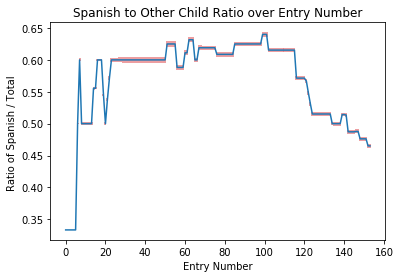

In [241]:
plt.title('Spanish to Other Child Ratio over Entry Number')
plt.ylabel('Ratio of Spanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, spanishOtherRatios)
plt.errorbar(entryNums, spanishOtherRatios, yerr=spanishVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Stackplot of Spanish to Addressee

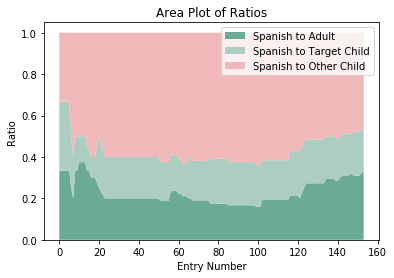

In [242]:
plt.stackplot(entryNums, [spanishAdultRatios, spanishTargetRatios, spanishOtherRatios], baseline='zero', 
              labels=['Spanish to Adult', 'Spanish to Target Child', 
                            'Spanish to Other Child'], colors=['#6aaa96', '#aecdc2', '#f0b8b8'])
plt.title('Area Plot of Ratios')
plt.xlabel('Entry Number')
plt.ylabel('Ratio')
plt.legend()
plt.show()

### Quechua to Adult

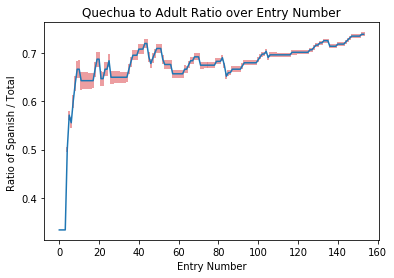

In [243]:
plt.title('Quechua to Adult Ratio over Entry Number')
plt.ylabel('Ratio of Spanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, quechuaAdultRatios)
plt.errorbar(entryNums, quechuaAdultRatios, yerr=quechuaVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Quechua to Target

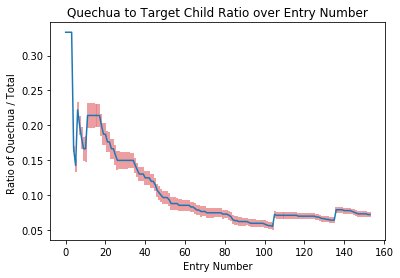

In [244]:
plt.title('Quechua to Target Child Ratio over Entry Number')
plt.ylabel('Ratio of Quechua / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, quechuaTargetRatios)
plt.errorbar(entryNums, quechuaTargetRatios, yerr=quechuaVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Quechua to Other Child

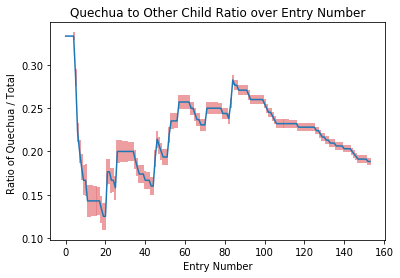

In [245]:
plt.title('Quechua to Other Child Ratio over Entry Number')
plt.ylabel('Ratio of Quechua / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, quechuaOtherRatios)
plt.errorbar(entryNums, quechuaOtherRatios, yerr=quechuaVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Stackplot of Quechua to Addressee

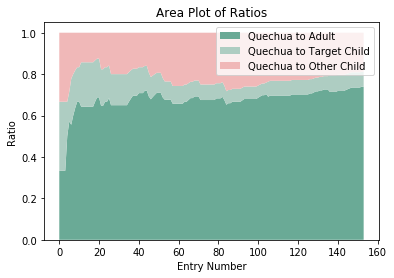

In [246]:
plt.stackplot(entryNums, [quechuaAdultRatios, quechuaTargetRatios, quechuaOtherRatios], baseline='zero', 
              labels=['Quechua to Adult', 'Quechua to Target Child', 'Quechua to Other Child'], colors=['#6aaa96', '#aecdc2', '#f0b8b8'])
plt.title('Area Plot of Ratios')
plt.xlabel('Entry Number')
plt.ylabel('Ratio')
plt.legend()
plt.show()

### Mixed to Adult

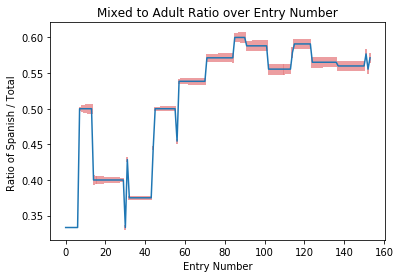

In [247]:
plt.title('Mixed to Adult Ratio over Entry Number')
plt.ylabel('Ratio of Spanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, mixedAdultRatios)
plt.errorbar(entryNums, mixedAdultRatios, yerr=mixedVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Mixed to Target

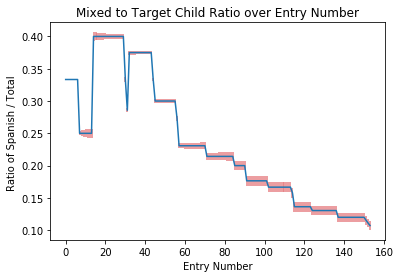

In [248]:
plt.title('Mixed to Target Child Ratio over Entry Number')
plt.ylabel('Ratio of Spanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, mixedTargetRatios)
plt.errorbar(entryNums, mixedTargetRatios, yerr=mixedVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Mixed to Other

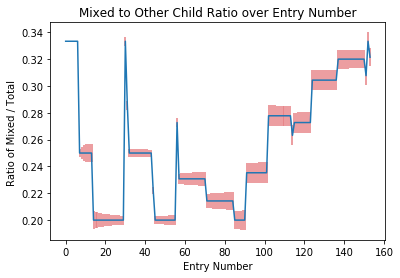

In [249]:
plt.title('Mixed to Other Child Ratio over Entry Number')
plt.ylabel('Ratio of Mixed / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, mixedOtherRatios)
plt.errorbar(entryNums, mixedOtherRatios, yerr=mixedVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Stackplot of Mixed to Addressee

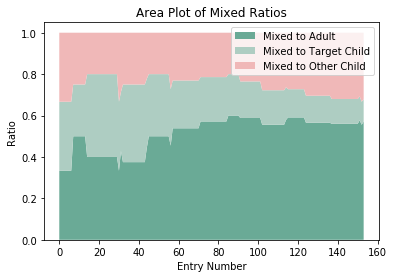

In [250]:
plt.stackplot(entryNums, [mixedAdultRatios, mixedTargetRatios, mixedOtherRatios], baseline='zero', 
              labels=['Mixed to Adult', 'Mixed to Target Child', 'Mixed to Other Child'], colors=['#6aaa96', '#aecdc2', '#f0b8b8'])
plt.title('Area Plot of Mixed Ratios')
plt.xlabel('Entry Number')
plt.ylabel('Ratio')
plt.legend()
plt.show()

### Adult to Spanish

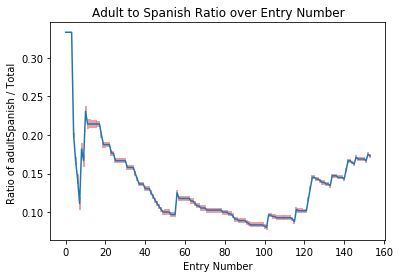

In [251]:
plt.title('Adult to Spanish Ratio over Entry Number')
plt.ylabel('Ratio of adultSpanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, adultSpanishRatios)
plt.errorbar(entryNums, adultSpanishRatios, yerr=adultVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Adult to Quechua


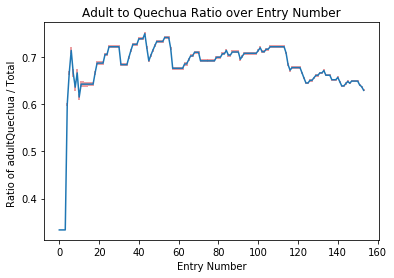

In [252]:
plt.title('Adult to Quechua Ratio over Entry Number')
plt.ylabel('Ratio of adultQuechua / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, adultQuechuaRatios)
plt.errorbar(entryNums, adultQuechuaRatios, yerr=adultVariances, fmt='none', ecolor='#e67f83');
plt.show()

### Adult to Mixed

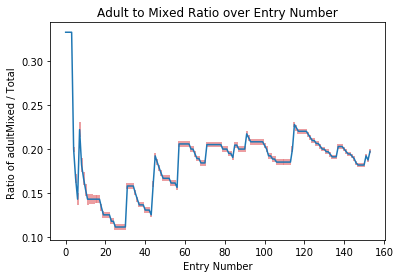

In [253]:
plt.title('Adult to Mixed Ratio over Entry Number')
plt.ylabel('Ratio of adultMixed / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, adultMixedRatios)
plt.errorbar(entryNums, adultMixedRatios, yerr=adultVariances, fmt='none', ecolor='#e67f83');
plt.show()

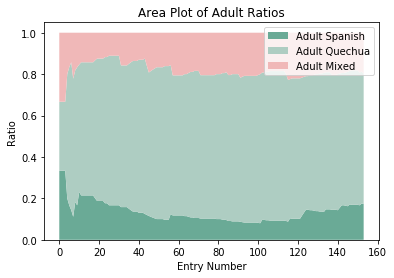

In [254]:
plt.stackplot(entryNums, [adultSpanishRatios, adultQuechuaRatios, adultMixedRatios], baseline='zero', 
              labels=['Adult Spanish', 'Adult Quechua', 'Adult Mixed'], colors=['#6aaa96', '#aecdc2', '#f0b8b8'])
plt.title('Area Plot of Adult Ratios')
plt.xlabel('Entry Number')
plt.ylabel('Ratio')
plt.legend()
plt.show()

### Target to Addressee

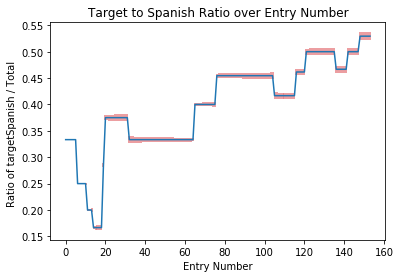

In [255]:
plt.title('Target to Spanish Ratio over Entry Number')
plt.ylabel('Ratio of targetSpanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, targetSpanishRatios)
plt.errorbar(entryNums, targetSpanishRatios, yerr=targetVariances, fmt='none', ecolor='#e67f83');
plt.show()

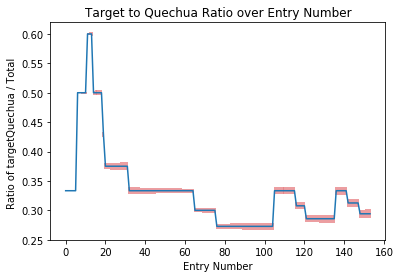

In [256]:
plt.title('Target to Quechua Ratio over Entry Number')
plt.ylabel('Ratio of targetQuechua / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, targetQuechuaRatios)
plt.errorbar(entryNums, targetQuechuaRatios, yerr=targetVariances, fmt='none', ecolor='#e67f83');
plt.show()

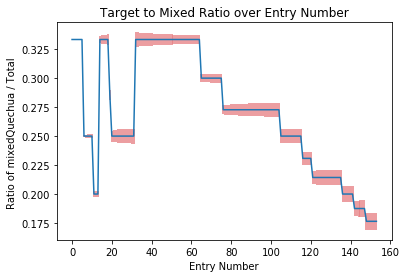

In [257]:
plt.title('Target to Mixed Ratio over Entry Number')
plt.ylabel('Ratio of mixedQuechua / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, targetMixedRatios)
plt.errorbar(entryNums, targetMixedRatios, yerr=targetVariances, fmt='none', ecolor='#e67f83');
plt.show()

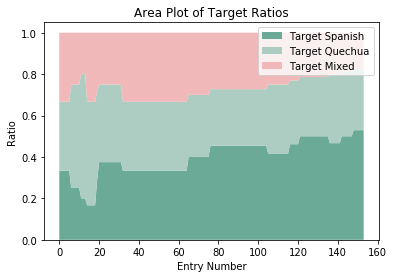

In [258]:
plt.stackplot(entryNums, [targetSpanishRatios, targetQuechuaRatios, targetMixedRatios], baseline='zero', 
              labels=['Target Spanish', 'Target Quechua', 'Target Mixed'], colors=['#6aaa96', '#aecdc2', '#f0b8b8'])
plt.title('Area Plot of Target Ratios')
plt.xlabel('Entry Number')
plt.ylabel('Ratio')
plt.legend()
plt.show()

### Other to Addressee

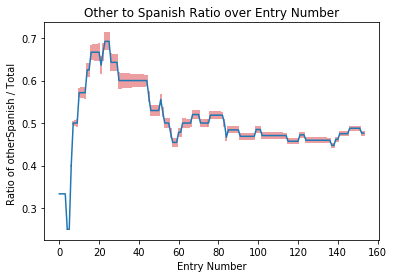

In [259]:
plt.title('Other to Spanish Ratio over Entry Number')
plt.ylabel('Ratio of otherSpanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, otherSpanishRatios)
plt.errorbar(entryNums, otherSpanishRatios, yerr=otherVariances, fmt='none', ecolor='#e67f83');
plt.show()

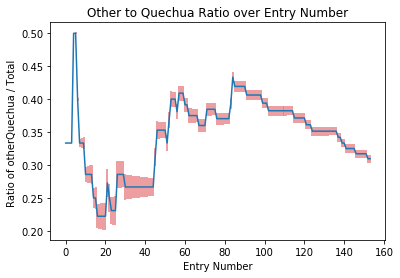

In [260]:
plt.title('Other to Quechua Ratio over Entry Number')
plt.ylabel('Ratio of otherQuechua / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, otherQuechuaRatios)
plt.errorbar(entryNums, otherQuechuaRatios, yerr=otherVariances, fmt='none', ecolor='#e67f83');
plt.show()

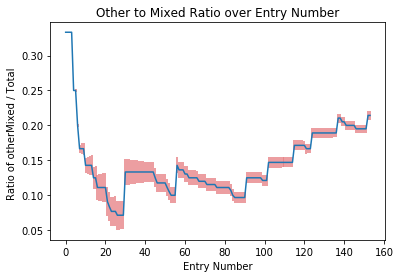

In [261]:
plt.title('Other to Mixed Ratio over Entry Number')
plt.ylabel('Ratio of otherMixed / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, otherMixedRatios)
plt.errorbar(entryNums, otherMixedRatios, yerr=otherVariances, fmt='none', ecolor='#e67f83');
plt.show()

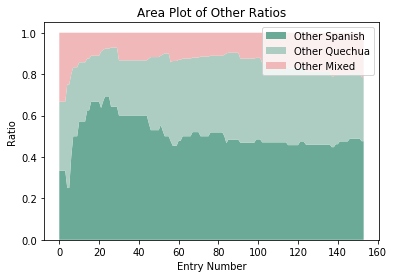

In [262]:
plt.stackplot(entryNums, [otherSpanishRatios, otherQuechuaRatios, otherMixedRatios], baseline='zero', 
              labels=['Other Spanish', 'Other Quechua', 'Other Mixed'], colors=['#6aaa96', '#aecdc2', '#f0b8b8'])
plt.title('Area Plot of Other Ratios')
plt.xlabel('Entry Number')
plt.ylabel('Ratio')
plt.legend()
plt.show()